- 정의 : 균형한 데이터 문제가 있을때 다수 클래스의 샘플 수를 줄여 데이터 셋의 클래스 비율을 맞추는 기법  
- 목적 :
    - 과적합 방지
    - 학습효율성 도모


In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler


In [2]:
# 데이터 불러오기 (가상데이터로 효과 확인)
# 랜덤 시드 설정 for reproducibility
RANDOM_STATE = 42

# 예시 데이터 생성
X, y = make_classification(n_samples=1000,      # 총 샘플 수
                           n_features=2,        # 특성 수
                           n_informative=2,     # 유용한 특성 수
                           n_redundant=0,       # 중복 특성 수
                           n_clusters_per_class=1,
                           weights=[0.95, 0.05],  # 클래스 비율: 95% 대 5%
                           flip_y=0,
                           random_state=RANDOM_STATE)

In [3]:
df = pd.DataFrame(X, columns = ['Feature1', 'Feature2'])

In [4]:
df['Target'] = y

In [ ]:
df['Target'].value_counts() # 데이터가 매우 불균형

Target
0    950
1     50
Name: count, dtype: int64

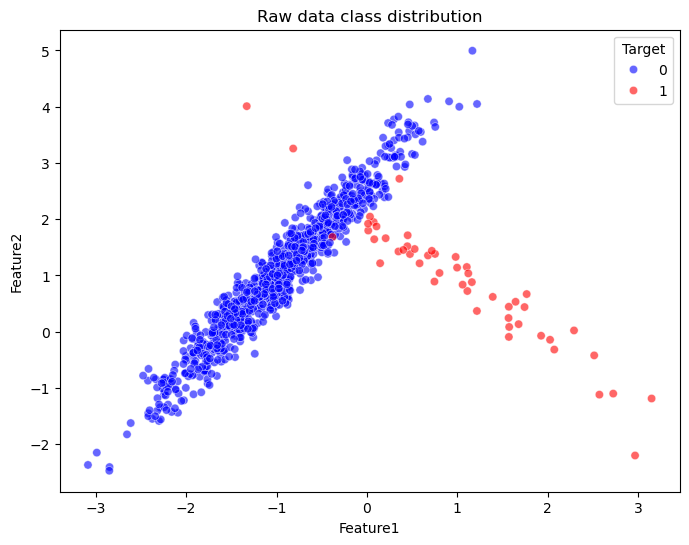

In [9]:
# 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=df, palette=['blue', 'red'], alpha=0.6)
plt.title('Raw data class distribution')
plt.show()

# 언더샘플링- RandomUnderSampler

In [10]:
rus = RandomUnderSampler(random_state=RANDOM_STATE)

In [11]:
x_rus, y_rus = rus.fit_resample(X,y)

In [12]:
df_rus = pd.DataFrame(x_rus, columns=['Feature1', 'Feature2'])

In [13]:
df_rus['Target'] = y_rus

In [14]:
print(df_rus['Target'] .value_counts())

Target
0    50
1    50
Name: count, dtype: int64


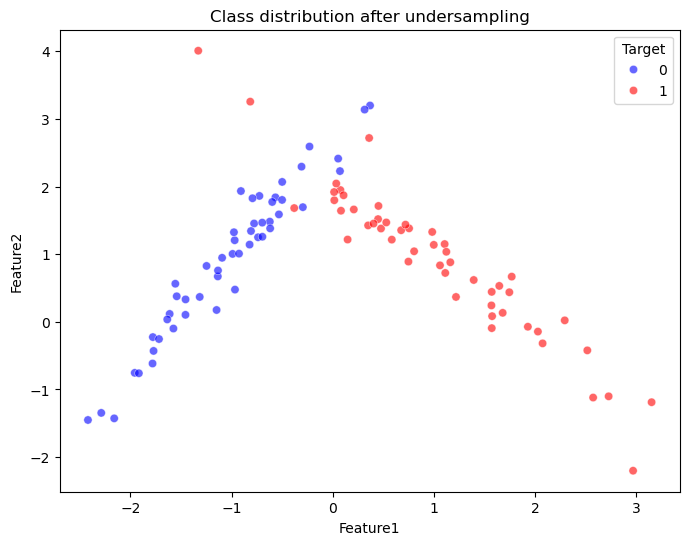

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=df_rus, palette=['blue', 'red'], alpha=0.6)
plt.title('Class distribution after undersampling')
plt.show()